# Loading and preparing the data

In [1]:
# We first import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# We now load the titanic data as a CSV
titanic_survival = pd.read_csv('Intro to data analysis.csv')

# Let's have a look at the data
titanic_survival.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# There should be data from 891 passengers
len(titanic_survival)

891

In [4]:
titanic_survival.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# What questions do we want to answer?

What factors made people more likely to survive? My assumption is that there were limited resources to save people and that there were some individuals trying to make decisions (maybe according to some protocol) about who to place on lifeboats first.
I suspect that the following factors may have an influence:
- Age: maybe children were more likely to be saved
- Sex: maybe women they were more likely to be saved
- Pclass: this is a proxy of social status and it's supposed to be the reason why Leonardo Di Caprio died in the movie
- Fare: could this be a stronger survival predictor than "Pclass"?
- parch: ok... if more children were saved, maybe they also saved their parents (specially the mother)
- sibs: maybe if your wife was saved, you were also likely to be saved

Additionally, I am curious also to answer these questions:
- Were there very different rates given the same Pclass. Maybe there were 2-3 top-luxury cabins? Or something similar?
- Were children and women more frequent in certain Pclass?

# Data cleaning

In [5]:
# Let's summarize the columns with numerical values to see if there's anything strange
titanic_survival[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].describe()

C:\Users\Evita\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Seems there are some NaN values, let's see how many.
titanic_survival.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Cabin, Age and Embarked seem to have some NaN. Let's explore why
null_age_series = titanic_survival['Age'].isnull()
titanic_survival[null_age_series]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


I did not detect any pattern at first glance so I assume the age was missing in some random cases.

In [9]:
# Let's do the same for the cabin
null_cabin_series = titanic_survival['Cabin'].isnull()
print "Table of number of passengers by class: missing cabin passengers"
print titanic_survival[null_cabin_series].groupby('Pclass')['PassengerId'].count()
print "Table of number of passengers by class: all sampled passengers"
print titanic_survival.groupby('Pclass')['PassengerId'].count()

Table of number of passengers by class: missing cabin passengers
Pclass
1     40
2    168
3    479
Name: PassengerId, dtype: int64
Table of number of passengers by class: all sampled passengers
Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64


So it seems that most of the passengers in classes 2 and 3 did not have a cabin assigned. We will keep this in mind, but we cannot draw any conclusion from this for the time being.

In [11]:
# Let's see what happened with the missing "Embarked" data
null_embarked_series = titanic_survival['Embarked'].isnull()
titanic_survival[null_embarked_series]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Ok, so it seems these two women had the same ticket number, paid the same price and were lodged in the same cabing (but they were not relatives). We cannot know what happened in this case, but we will consider this irrelevant for the time being.

# Data Exploration

Let's do some basic quick plots to familiarize ourselves with the data a little bit.

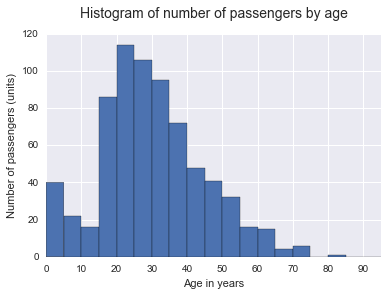

In [47]:
# Let's explore the age
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Histogram of number of passengers by age', fontsize = 14, y = 1.05)
ax.set_ylabel('Number of passengers (units)')
ax.set_xlabel('Age in years')
ax.set(xticks = range(0, 100, 10))
titanic_survival['Age'].hist(bins = range(0, 100, 5), ax = ax)
plt.show()

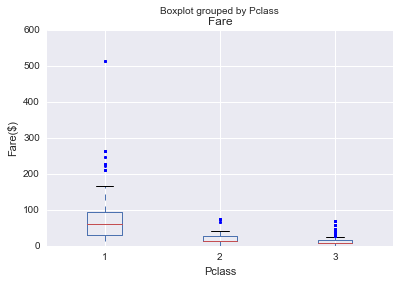

In [68]:
# Let's draw a boxplot of ticket fares
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Pclass")
ax.set_ylabel("Fare($)")
titanic_survival.boxplot(ax = ax, column = 'Fare', by='Pclass', sym = 'k.')

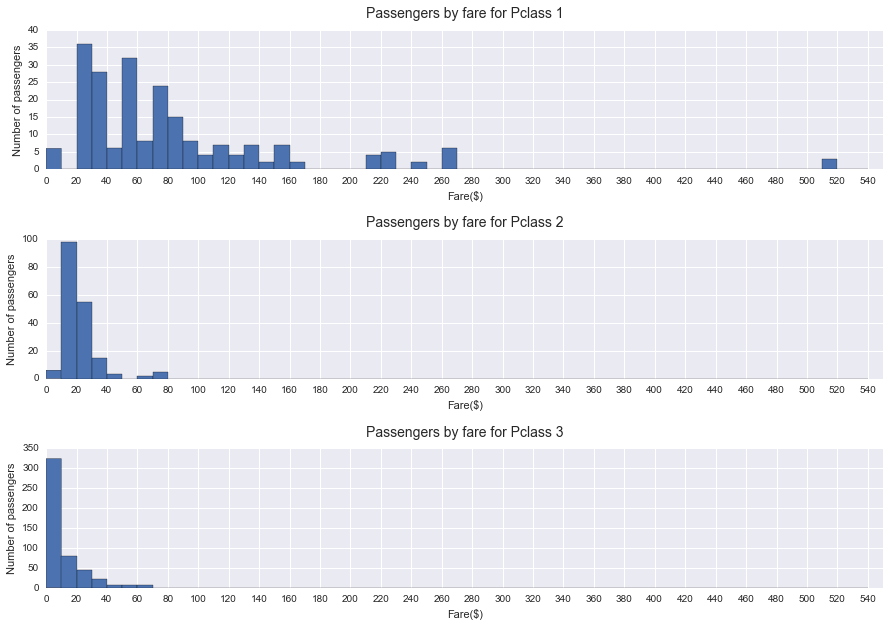

In [137]:
# We now plot three histograms for each of the classes
fig, axes = plt.subplots(nrows = 3, ncols  = 1, figsize = [15, 10])
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)

current_class = 1
for ax in axes.flat:
    ax.set_title("Passengers by fare for Pclass "+str(current_class), y = 1.05, fontsize = 14)
    ax.set(ylabel = "Number of passengers", xlabel = "Fare($)", xticks = range(0,550, 20))
    ax.set_xlim(0, 550)
    ax.set_yticks
    titanic_survival[titanic_survival['Pclass'] == current_class ]['Fare'].hist(ax = ax, bins = range(0, 550, 10))
    current_class += 1

In [132]:
# Let's build a small table now
titanic_survival.groupby('Pclass')['Fare'].describe()

Pclass       
1       count    216.000000
        mean      84.154687
        std       78.380373
        min        0.000000
        25%       30.923950
        50%       60.287500
        75%       93.500000
        max      512.329200
2       count    184.000000
        mean      20.662183
        std       13.417399
        min        0.000000
        25%       13.000000
        50%       14.250000
        75%       26.000000
        max       73.500000
3       count    491.000000
        mean      13.675550
        std       11.778142
        min        0.000000
        25%        7.750000
        50%        8.050000
        75%       15.500000
        max       69.550000
Name: Fare, dtype: float64

Ok... There are some outliers in all three classes. Seems evident that in case of Pclass 1 there were several kinds of cabins: normal, suites, presidential suite, etc. But what about classes 2 and 3? Maybe the cheapest rates in these classes placed you in a "common area" and if you wanted a "private area" you had to pay more.

In [133]:
# Let's add an indicator variable to indicate whether the passenger had a cabin or not
titanic_survival['cabin_boolean'] = titanic_survival['Cabin'].isnull() == False

In [134]:
titanic_survival

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_boolean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,False
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,True
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,False
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,False
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,False


In [135]:
titanic_survival.pivot_table(['Fare'], index=['Pclass'], columns = 'cabin_boolean')

Fare           
cabin_boolean      False      True 
Pclass                             
1              76.848643  85.815152
2              20.909673  18.063544
3              13.725077  11.698608

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000012F95240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000013085AC8>]], dtype=object)

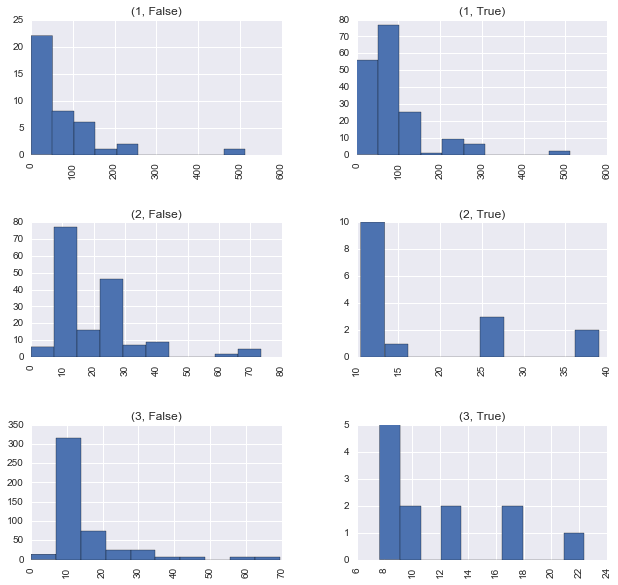

In [140]:
titanic_survival['Fare'].hist(by=[titanic_survival['Pclass'], titanic_survival['cabin_boolean']], figsize = (10, 10))
# To reviewer: how can I effectively add titles and labels to these plots?

This plots do not lead anywhere and the crosstab contradicts our intuition. So, for the time being, we will consider this "cabin" issue as irrelevant.

# Where children and women more frequent in a certain Pclass?

We first consider a very basic definition of a child: every passenger of age less than 16 years old will be considered a child.

In [141]:
# Let's add an indicator column that indicates if a passenger is a child
titanic_survival['boolean_child'] = titanic_survival['Age'] <= 16
titanic_survival

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_boolean,boolean_child
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,False
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,False,False
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,True,False
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,False,True
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,False,False
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,False,True


Let's now build some crosstabs to see if our intuition is right.

In [142]:
# What proportion of passengers were in each class?
print len(titanic_survival)
titanic_survival.groupby('Pclass')['PassengerId'].count()/len(titanic_survival)

891


Pclass
1    0.242424
2    0.206510
3    0.551066
Name: PassengerId, dtype: float64

In [143]:
# What was the proportion of children
titanic_survival.groupby('boolean_child')['PassengerId'].count()/len(titanic_survival)

boolean_child
False    0.887767
True     0.112233
Name: PassengerId, dtype: float64

In [144]:
# What was the proportion of women
titanic_survival.groupby('Sex')['PassengerId'].count()/len(titanic_survival)

Sex
female    0.352413
male      0.647587
Name: PassengerId, dtype: float64

In [155]:
pd.crosstab(titanic_survival['Pclass'], titanic_survival['Sex'], margins = False).apply(lambda x: x/x.sum(), axis = 1)

Sex,female,male
Pclass,,
1,0.435185,0.564815
2,0.413043,0.586957
3,0.293279,0.706721


In [146]:
pd.crosstab(titanic_survival['Pclass'], titanic_survival['boolean_child'], margins = False).apply(lambda x: x/x.sum(), axis = 1)

boolean_child,False,True
Pclass,,
1,0.958333,0.041667
2,0.885870,0.114130
3,0.857434,0.142566


Given these tables it seems that:
- Ratio of female passengers was more frequent in classes 1 and 2 versus class 3
- Ratio of children was higher in classes 2 and 3 versus class 1
To see if these differences are significant statistically, we wold have to perform some hypothesis testing.

# What factors made people more likely to survive

What factors made people more likely to survive? My assumption is that there were limited resources to save people and that there were some individuals trying to make decisions (maybe according to some protocol) about who to place on lifeboats first. I suspect that the following factors may have an influence:
- Age: maybe children were more likely to be saved
- Sex: maybe women they were more likely to be saved
- Pclass: this is a proxy of social status and it's supposed to be the reason why Leonardo Di Caprio died in the movie
- Fare: this is also a proxy of social status
- parch: ok... if more children were saved, maybe they also saved their parents (specially the mother), so it can be that having parch > 0 is positive to be saved
- sibs: maybe if your wife/brother was saved, you were also likely to be saved

## Age

We first investigate age. We previously defined a child as a passenger of less than 16 years old. Let's see if children were more likely to be saved.

In [173]:
titanic_survival.groupby(['boolean_child', 'Survived'])['PassengerId'].count().apply
titanic_survival.pivot_table(index=['boolean_child'], columns = 'Survived', aggfunc=len, values = 'PassengerId')

Survived,0,1
boolean_child,,
False,504,287
True,45,55


We have to look at the proportions in order to draw conclusions:

In [174]:
pd.crosstab(titanic_survival['boolean_child'], titanic_survival['Survived']).apply(lambda x: x/x.sum(), axis = 1)

Survived,0,1
boolean_child,,
False,0.637168,0.362832
True,0.450000,0.550000


titanic_survival.groupby(['boolean_child']).groups

So it seems that 55% of passengers of less than 16 years old were saved versus 36% of passengers older than 16 years old.

Maybe we can do better. A 1 year old baby has very little in common with a 16 years old, so we will classify people according to the following rules:
- Baby: < 1 year old
- Toddler: < 4 years old and >= 1 years old
- Child: < 10 years old and >= 4 years old
- Pre-teen: < 13 years old and >= 10 years old
- Teen: < 19 years old and >= 14 years old

In [175]:
# Let's build a function for this
def classify_by_age(age):
    '''
    Returns a classification keyword based on the age
    Inputs:
    age (float) -- age of the passenger in years
    Outputs:
    string -- string indicating if passenger is a baby, toddler, etc
    '''
    if age < 1:
        return 'baby'
    elif age < 3:
        return 'toddler'
    elif age < 10:
        return 'child'
    elif age < 13:
        return 'preteen'
    elif age < 19:
        return 'teen'
    elif age < 125:
        return 'adult'
    else:
        return 'not determined'

In [176]:
# We build a column with this
age_order = ['baby', 'toddler', 'child', 'preteen', 'teen', 'adult', 'not determined']
titanic_survival['age_classification'] = titanic_survival['Age'].apply(classify_by_age)

In [177]:
# Let's build a similar table with this
pd.crosstab(titanic_survival['age_classification'], titanic_survival['Survived']).reindex(copy = False, index = age_order)

Survived,0,1
age_classification,,
baby,0,7
toddler,9,8
child,15,23
preteen,5,2
teen,40,30
adult,355,220
not determined,125,52


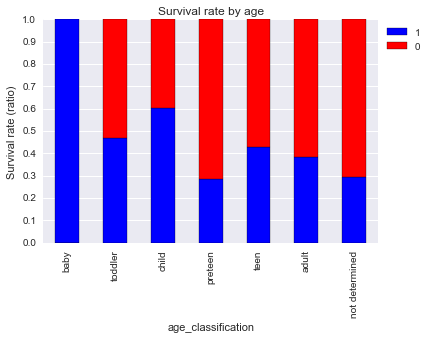

In [239]:
# Let's compute the ratios
survival_by_age = pd.crosstab(titanic_survival['age_classification'],
            titanic_survival['Survived']).apply(lambda x: x / x.sum(), axis = 1).reindex(copy = False, index = age_order)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(xlabel="Age classification groups", ylabel="Survival rate (ratio)", title = "Survival rate by age", yticks = np.arange(0, 1.1, 0.1))
survival_by_age.iloc[:,::-1].plot.bar(ax = ax, stacked = True, colors=['b', 'r'])
ax.legend(loc="best", bbox_to_anchor=(1, 1))


From this data it seems that probabilities of surviving were higher for children younger than 10 years old and moderately higher in case of children younger than 19 years old. It is suprising that "preteens" were unlikely to be saved but there were only 7 data points here, so it's likely this data is not so statistically significant.

We can try, however, with a different age split. Let's try to split ages in buckets of 5 years

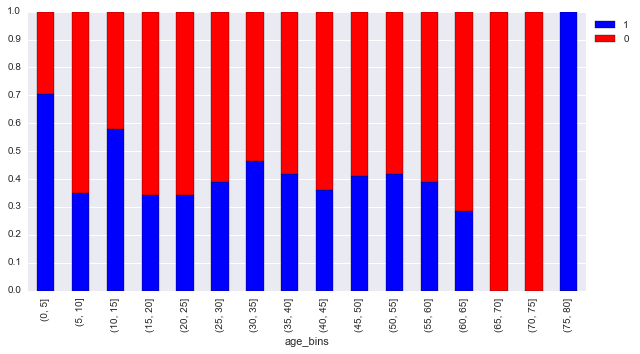

In [255]:
# Split ages in buckets of 5 years
age_bins = range(0, 85, 5)
titanic_survival['age_bins'] = pd.cut(titanic_survival['Age'], age_bins)
survival_by_age_bins = pd.crosstab(titanic_survival['age_bins'], titanic_survival['Survived']).apply(lambda x: x/x.sum(), axis = 1)
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)
survival_by_age_bins.iloc[:,::-1].plot.bar(ax = ax, stacked = True, colors = ['b', 'r'])
ax.set(yticks = np.arange(0,1.1, 0.1))
ax.legend(loc = "best", bbox_to_anchor=(1, 1))

Ok, so in general, we see a similar trend: young children were probably saved while older people was less likely to be saved.

## Sex

We now perform the same analyis for women.

In [179]:
pd.crosstab(titanic_survival['Sex'], titanic_survival['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [180]:
pd.crosstab(titanic_survival['Sex'], titanic_survival['Survived']).apply(lambda x: x / x.sum(), axis = 1)

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


74% of women in the sample survived compared to 10% of males. It seems that the "Women first" policy was part of the protocol.

We do the same for Pclass:

## Pclass

In [181]:
pd.crosstab(titanic_survival['Pclass'], titanic_survival['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [182]:
# Now we calculate the percentages

survival_by_Pclass = pd.crosstab(titanic_survival['Pclass'], titanic_survival['Survived']).apply(lambda x: x / x.sum(), axis = 1)

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


It seems that 1st class passengers had an advantage. However, we should be cautious. It could be the case that this is happening because women are more frequent in class 1 (as we saw before).

# Fare

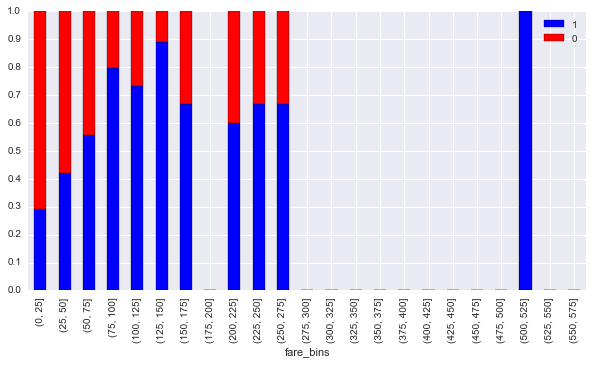

In [274]:
# Let's compute some fare buckets
fare_bins = range(0, 600, 25)
titanic_survival['fare_bins'] = pd.cut(titanic_survival['Fare'], fare_bins)
survived_by_fare_bins = pd.crosstab(titanic_survival['fare_bins'], titanic_survival['Survived']).apply(lambda x: x/x.sum(), axis = 1)
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)
survived_by_fare_bins.iloc[:,::-1].plot.bar(ax = ax, stacked = True, colors = ['b', 'r'])
ax.set(yticks = np.arange(0,1.1, 0.1))
ax.legend(loc = "best", bbox_to_anchor=(1, 1))

We also see a positive tendency here: it seems that the higher the price you paid for the trip, the more likely you were to be saved. Note that people that only 30% of the people that payed less than 25 dollars was saved compared to 60-90% of the people that paid more than 75 dollars.

## Parch and sibs

Now, we calculate similar tables for "parch" and for "sibs"

In [276]:
pd.crosstab(titanic_survival['Parch'], titanic_survival['Survived'])

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [277]:
pd.crosstab(titanic_survival['Parch'], titanic_survival['Survived']).apply(lambda x: x / x.sum(), axis = 1)
# To reviewer: is there any other more efficient way to normalize the data?

Survived,0,1
Parch,,
0,0.656342,0.343658
1,0.449153,0.550847
2,0.500000,0.500000
3,0.400000,0.600000
4,1.000000,0.000000
5,0.800000,0.200000
6,1.000000,0.000000


Ok. For Parch > 2 there is not a lot of data. For Parch <= 2 the table is not very revealing but it is consistent with my intuition: passengers with parents or children aboard are more likely to be children or mothers (both more likely to be saved).
It would be interesting to do this table for children and adults separately:

In [278]:
pd.crosstab(titanic_survival['SibSp'], titanic_survival['Survived'])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [280]:
pd.crosstab(titanic_survival['SibSp'], titanic_survival['Survived']).apply(lambda x: x / x.sum(), axis = 1)

Survived,0,1
SibSp,,
0,0.654605,0.345395
1,0.464115,0.535885
2,0.535714,0.464286
3,0.750000,0.250000
4,0.833333,0.166667
5,1.000000,0.000000
8,1.000000,0.000000


Only, 34.5% of the people with no siblings/spouses aboard survived while people with 1 or 2 siblings/spouses were more likely to be saved (46-53%).

# Conclusions

Ok, after this superficial study, we are more familiar with the data and we can start to make more solid hypothesis. Note that the conclusions listed here are tentative: because we studied variables one by one, we were not able to study interactions between variables. Anyway, these hypothesis would be good as a starting point:
- Children of less than 15 years old were more likely to be saved
- Women were more likely to be saved
- Pclass and Fare price were predictors of survival: the more you paid for the ticket, the most likely you were to be saved
- Having children/parents and/or siblings/spouses aboard increased the odds of survival

We should perform statistical tests to validate the hypothesis above (hypothesis testing) and while positive results may have predictive value, they would not imply that the hypothesis are true: correlation does not imply causation. Also, as we mentioned earlier, there are some interactions we may have missed. For example:
- Maybe more high Pclass passengers were saved because there were more women in class 1 and 2 than in class 3
- Maybe having >0 Parch was a predictor of being saved because a disproportionate amount of these passengers were children
- etc.
- etc.

In summary, to draw more solid conclusions, a more rigorous and sophisticated analysis would be needed.